# LAB 9-3 얼굴 찾기: CNN 활용하기
***
### 실습 목표
> SVM을 이용했던 6장 미니 프로젝트 B1의 결과를 개선하기 위해 CNN을 적용해 보자. SVM은 입력을 바로 처리하기가 힘들어 HOG, 즉 이미지 각 픽셀의 기울기를 구해 그 히스토그램을 분석을 위한 특징으로 활용했는데. CNN은 이러한 과정 없이 스스로 특징을 찾아낸다.
***
1. 데이터 확인

In [1]:
#!pip install tensorflow
#!pip install numpy --upgrade

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

In [3]:
# 훈련시킬 데이터들 물러오기(얼굴이미지)
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    face_images.append(img)

<Figure size 432x288 with 0 Axes>

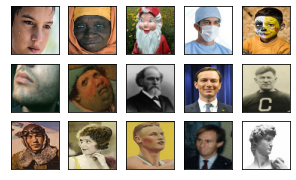

In [4]:
# 3행 5열로 이미지 보여주기
def plot_images(nRow, nCol, img):
    flg = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])
            
plot_images(3,5, face_images)

2. 사람 얼굴이 아닌 이미지 준비

<Figure size 432x288 with 0 Axes>

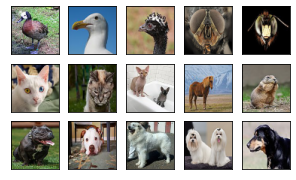

In [5]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)
    
plot_images(3,5, animal_images)

3. 학습을 위한 데이터 만들기

In [6]:
# 얼굴 이미지와 동물그림을 합쳐 핛습용 데이터 준비
X = face_images + animal_images
y = [ [1,0] ] * len(face_images) + [ [0,1] ] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 64, 64, 3) (30, 2)


4. 학습을 위한 CNN 모델 만들기

In [8]:
import tensorflow as tf
from tensorflow import keras

# 학습을 위한 CNN모델 생성

model = keras.models.Sequential([
    # 입력층
    keras.layers.Conv2D(input_shape = (64, 64, 3),
                       kernel_size = (3,3), filters = 32),
    # 은닉층
    keras.layers.MaxPooling2D((2, 2), strides = 2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides = 2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.Flatten(),
    # 활성화 함수들 정의
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    # 출력층
    keras.layers.Dense(2, activation = 'softmax'),
])

In [9]:
# 모델 요약
# 학습 실패여부 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0

In [10]:
# 100 에폭으로 학습 진행, 이때 정확도와 손실률 저장
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 977ms/step - loss: 0.6946 - accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6733 - accuracy: 0.6333
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6471 - accuracy: 0.7000
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6143 - accuracy: 0.5667
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5958 - accuracy: 0.6333
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5361 - accuracy: 0.8000
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4807 - accuracy: 0.9667
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4477 - accuracy: 0.8667
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4248 - accuracy: 0.9000
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3837 - accuracy: 0.8667
Epoch 11/100
1/1 [

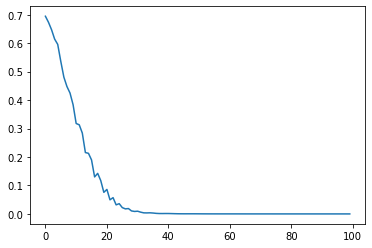

In [11]:
# 저장된 데이터 그래프화
plt.plot(history.history['loss'])

1/1 [==============================] - 0s 97ms/step


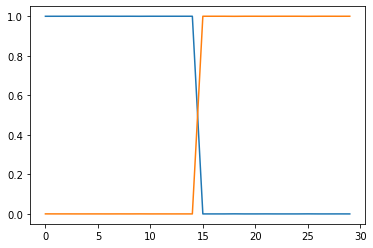

In [12]:
# 처음에 사람데이터, 후에 동물 데이터로 저장했으므로 잘 분류된것을 확인할 수 있음
yhat = model.predict(X)
plt.plot(yhat)

5. 새로운 데이터에 적용해 보기

<Figure size 432x288 with 0 Axes>

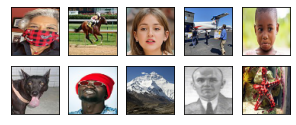

In [13]:
# 이전과 같은 방식으로 실험용 데이터 준비
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)
    
test_images = np.array(test_images)
plot_images(2, 5, test_images)

1/1 [==============================] - 0s 22ms/step


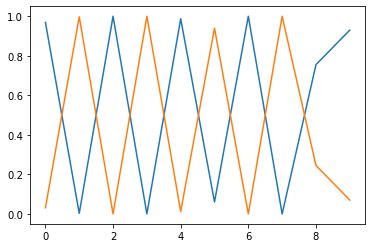

In [14]:
# 예측 실행
test_result = model.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

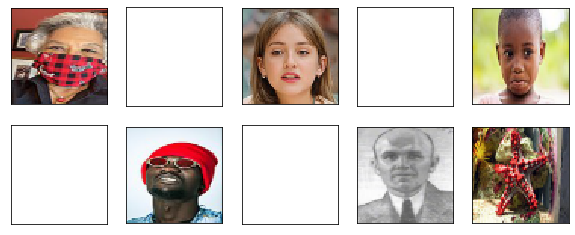

In [15]:
# 결과 값이 0.5이상만(즉 사람으로 예측한 데이터만) 출력
# 애매한 그림을 제외하고 비교적 잘 분류한 것을 확인 할 수 있다.
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        if test_result[i*5+j][0] > 0.5:
            ax[i, j].imshow(test_images[i*5+j], interpolation='nearest')